In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set up notebook to show all outputs in a cell, not only last one


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
url = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url,sep=',')

In [3]:
# Inspect the first few rows
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [10]:
# Convert 'hour_beginning' column to datetime
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

In [11]:
# Filter for weekdays only (Monday=0, Sunday=6)
df_weekdays = df[df['hour_beginning'].dt.dayofweek < 5]



In [12]:
# Filter for the year 2019
df_2019 = df_weekdays[df_weekdays['hour_beginning'].dt.year == 2019]


In [15]:
# Group by day of the week and sum pedestrian counts
ped_counts_by_day = df_2019.groupby(df_2019['hour_beginning'].dt.day_name())['Pedestrians'].sum()

# Ensure the weekdays are in the correct order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
ped_counts_by_day = ped_counts_by_day.reindex(weekday_order)

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='hour_beginning'>

Text(0.5, 1.0, 'Brooklyn Bridge Pedestrian Counts by Weekday in 2019')

Text(0.5, 0, 'Day of the Week')

Text(0, 0.5, 'Total Pedestrian Count')

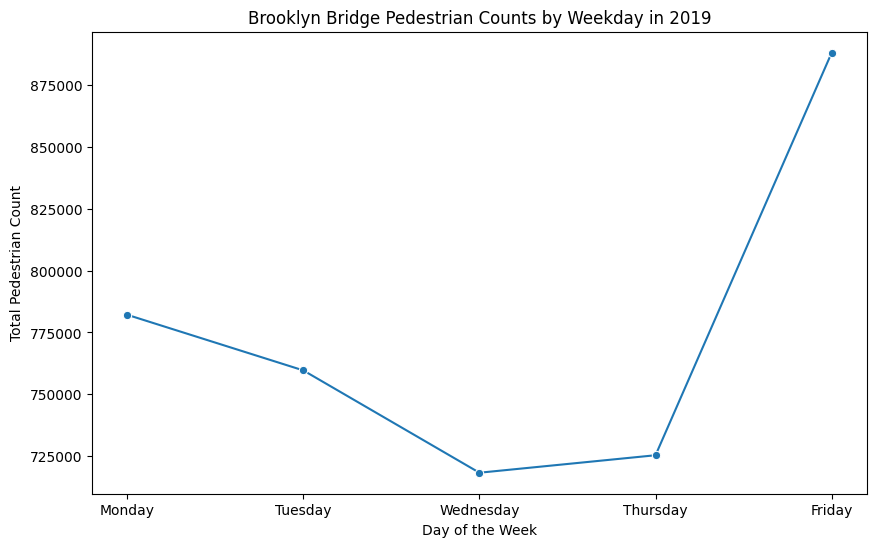

In [16]:
# Plot line graph
plt.figure(figsize=(10,6))
sns.lineplot(x=ped_counts_by_day.index, y=ped_counts_by_day.values, marker='o')
plt.title('Brooklyn Bridge Pedestrian Counts by Weekday in 2019')
plt.xlabel('Day of the Week')
plt.ylabel('Total Pedestrian Count')
plt.show()

In [17]:
# Analyze effect of weather (assuming a 'Events' or 'Weather' column exists)
if 'Events' in df_2019.columns:
    ped_by_weather = df_2019.groupby('Events')['Brooklyn Bridge'].sum().sort_values(ascending=False)

<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Between Weather Events and Pedestrian Counts')

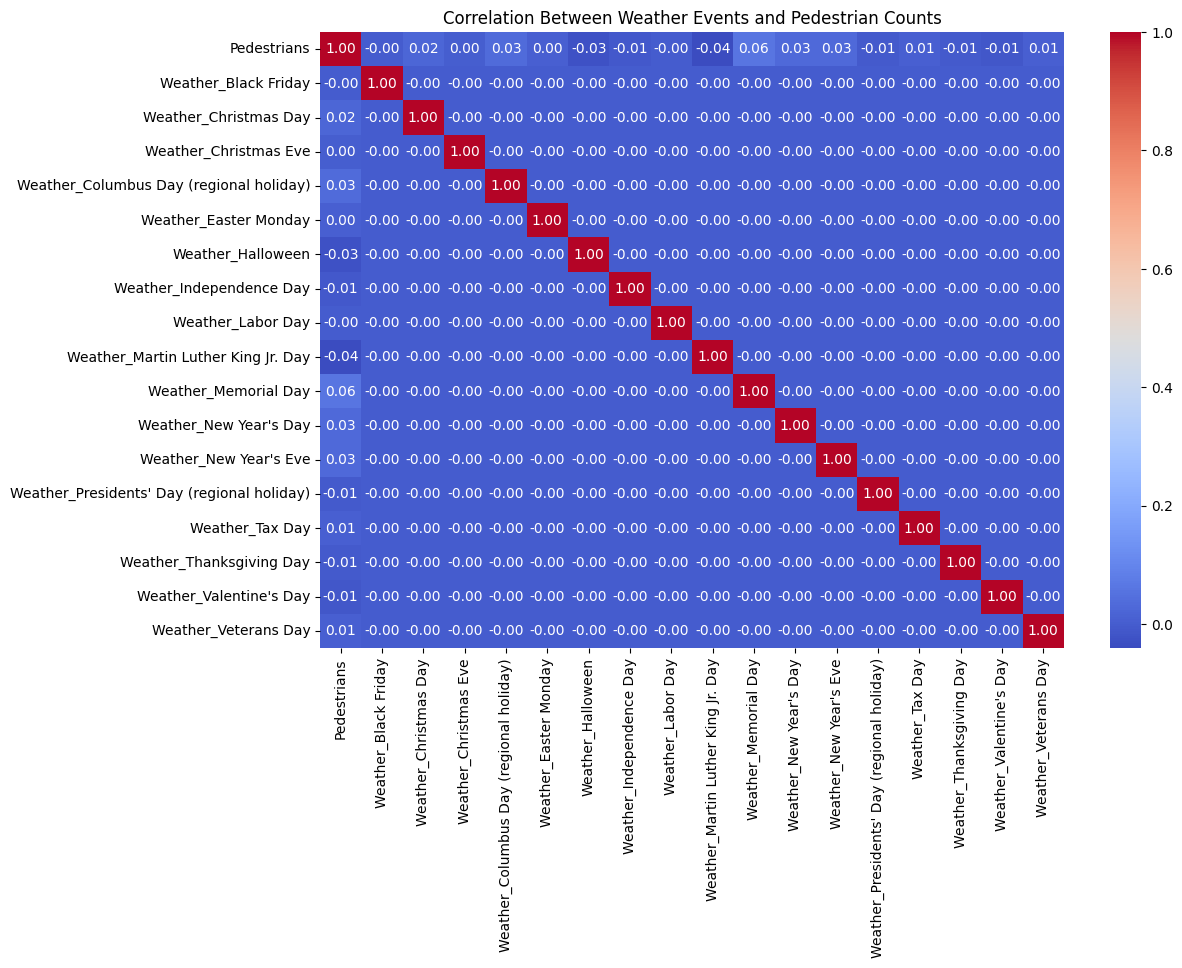

In [20]:
# Correlation matrix
if 'events' in df_2019.columns and df_2019['events'].notna().any():
    df_weather = df_2019[['Pedestrians']].copy()
    df_weather = pd.concat([df_weather, pd.get_dummies(df_2019['events'], prefix='Weather')], axis=1)
    corr_matrix = df_weather.corr()

    plt.figure(figsize=(12,8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Between Weather Events and Pedestrian Counts')
    plt.show()
else:
    print("Weather/Event column not found or contains only missing values, skipping correlation analysis.")

In [21]:
# Categorize time of day
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df_2019 = df_weekdays[df_weekdays['hour_beginning'].dt.year == 2019].copy()
df_2019['Time_of_Day'] = df_2019['hour_beginning'].dt.hour.apply(categorize_time)

/tmp/ipython-input-856115103.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['Time_of_Day'] = df_2019['hour_beginning'].dt.hour.apply(categorize_time)


<Figure size 800x600 with 0 Axes>

/tmp/ipython-input-799524638.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ped_by_time.index, y=ped_by_time.values, palette='viridis')


<Axes: xlabel='Time_of_Day'>

Text(0.5, 1.0, 'Pedestrian Counts by Time of Day on Brooklyn Bridge (2019)')

Text(0, 0.5, 'Total Pedestrian Count')

Text(0.5, 0, 'Time of Day')

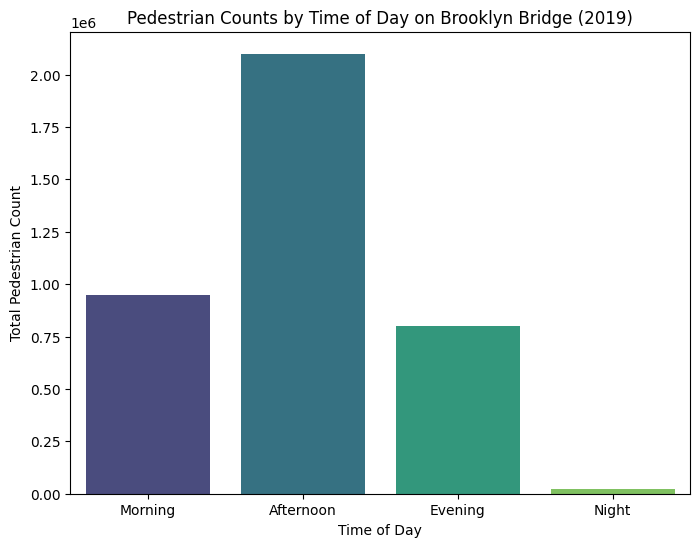

In [23]:
# Analyze pedestrian counts by time of day
ped_by_time = df_2019.groupby('Time_of_Day')['Pedestrians'].sum().reindex(['Morning', 'Afternoon', 'Evening', 'Night'])

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=ped_by_time.index, y=ped_by_time.values, palette='viridis')
plt.title('Pedestrian Counts by Time of Day on Brooklyn Bridge (2019)')
plt.ylabel('Total Pedestrian Count')
plt.xlabel('Time of Day')
plt.show()